### Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) ¶

In [1]:
import pandas as pd                         #Panda us basic high performance data analysis tool
import numpy as np                          #NumPy is package related with  linear algebr
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

/Users/fabiosavorgnan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



### Loading the data into the data frame

To load the data into the pandas data frame, read the CSV into a data frame and from local drive. Check head(first five rows) and tail(last five rows) of data frsme to ensure data is entered properly.

In [3]:
df = pd.read_csv("cardio_train.csv", sep=';')
# To display the \ 5 rows 
df.head(5)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

Look at last 5 rows to esnure all the data is transfered from csv file to dataframe in python.

In [4]:
df.tail(5)                        # To display the botton 5 rows

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0


### Checking the types of data

Check for the datatypes to ensure integer are not stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [5]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


### Size of Data set
Find the size/dimenstion of dataset i.e. sharing number of rows and columns. This data set contains 70K rows and 13 columns.


In [6]:
df.shape       ## Dim of data frme

(70000, 13)

Filter the data and remove the outliers from dataframe. Removed approxinatley 5K rows from the data. 

In [7]:
# Remove Outlier
df=df.loc[(df.ap_lo>60) & (df.ap_lo<120) & (df.ap_hi<200) & (df.ap_hi>90) & (df.weight>45) & (df.weight<300) & (df.height<200) & (df.height>130)]
df.shape

(64944, 13)


### Finding the duplicate rows
Dataset contains more tha 70K rows may have some duplicate data which might be skew the outcome, so it critical to find the dublicate data rows and remove all the duplicate rows from the data-set. In this data no dublicate rows were found. So no removal is requred.


In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape) 

number of duplicate rows:  (0, 13)



### Count the number of rows for each column
This is to find the number of rows and see how many rows are blank of nulls

In [9]:
df.count()      # Used to count the number of rows

id             64944
age            64944
gender         64944
height         64944
weight         64944
ap_hi          64944
ap_lo          64944
cholesterol    64944
gluc           64944
smoke          64944
alco           64944
active         64944
cardio         64944
dtype: int64


### Check for Null

Statement below is used to find number of nulls in the dataframe. Data is very clean and no nulls were found in the dataframe.

In [10]:
print(df.isnull().sum())     #count the number of nulls in the data set

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


No null data found


### Statistical Summary

To better understaning of data creat a Statistical Summary or 5-point summary of the cleaned up dataset . The 5-point summary tells the descriptive summary which includes mean, median, mode, no. of rows, maximum value, and minimum value for each variable.


In [11]:
df.describe() 

id           age        gender        height        weight  \
count  64944.000000  64944.000000  64944.000000  64944.000000  64944.000000   
mean   49940.786693  19506.765490      1.354613    164.595759     74.576384   
std    28852.601526   2454.395296      0.478400      7.789351     14.064159   
min        0.000000  10859.000000      1.000000    131.000000     46.000000   
25%    24923.750000  17777.000000      1.000000    159.000000     65.000000   
50%    49964.500000  19723.000000      1.000000    165.000000     72.000000   
75%    74848.250000  21354.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    198.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  64944.000000  64944.000000  64944.000000  64944.000000  64944.000000   
mean     127.476241     82.123891      1.369488      1.228181      0.088368   
std       15.398784      8.085994      0.683930      0.575024      0.283832   
min       93.000000     61.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max      197.000000    119.000000      3.000000      3.000000      1.000000   

               alco       active        cardio  
count  64944.000000  64944.00000  64944.000000  
mean       0.053692      0.80323      0.505697  
std        0.225411      0.39756      0.499971  
min        0.000000      0.00000      0.000000  
25%        0.000000      1.00000      0.000000  
50%        0.000000      1.00000      1.000000  
75%        0.000000      1.00000      1.000000  
max        1.000000      1.00000      1.000000


Age is measured in days, height is in centimeters. Let's look ate the numerical variables and how are they spread among target class.


Age is measured in days,convert the days into years and round up to integer. Evaluate the data for every age group (in yearS) and how age is realeted to cardio informtion provided with data. It is observed that number CVD (Cardio Vescular Disease) case excides non CVD cases after the age of 54.


### Add new variable to dataframe 

BMI: Body Mass Index
age_yr: Convert age in days to age in yers rounted up nearest year
age_cat: Add three category of age adult, Mid_aged and Aged


In [39]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df['age_yr'] = (df['age'] / 365).round().astype('int')
def calculate_age(days):
  days_year = 365.2425
  age = int(days // days_year)
  return age

# Age groups classification
def categorize_age(age):
  if 0 < age <= 50:
    return "Adult (0 to 50)"
  elif 50 < age <= 65:
    return "Mid_Aged (50 to 65)"
  elif 65 < age:
    return "Aged (<65)"
df['age_cat'] = df['age_yr'].apply(lambda x: categorize_age(x))

df.head(5)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168      62    110     80            1     1      0   
1   1  20228       1     156      85    140     90            3     1      0   
2   2  18857       1     165      64    130     70            3     1      0   
3   3  17623       2     169      82    150    100            1     1      0   
5   8  21914       1     151      67    120     80            2     2      0   

   alco  active  cardio        BMI  age_yr              age_cat  
0     0       1       0  21.967120      50      Adult (0 to 50)  
1     0       1       1  34.927679      55  Mid_Aged (50 to 65)  
2     0       0       1  23.507805      52  Mid_Aged (50 to 65)  
3     0       1       1  28.710479      48      Adult (0 to 50)  
5     0       0       0  29.384676      60  Mid_Aged (50 to 65)

In [13]:
df.shape

(64944, 16)

In [14]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 15
sns.countplot(y='years', hue='cardio', data = df);

ValueError: Could not interpret input 'years'

Carry out similar analysis with Weight. Trend in below graph shows the number of CVD is more than non COVD cases afteer weight of 75 Kg.

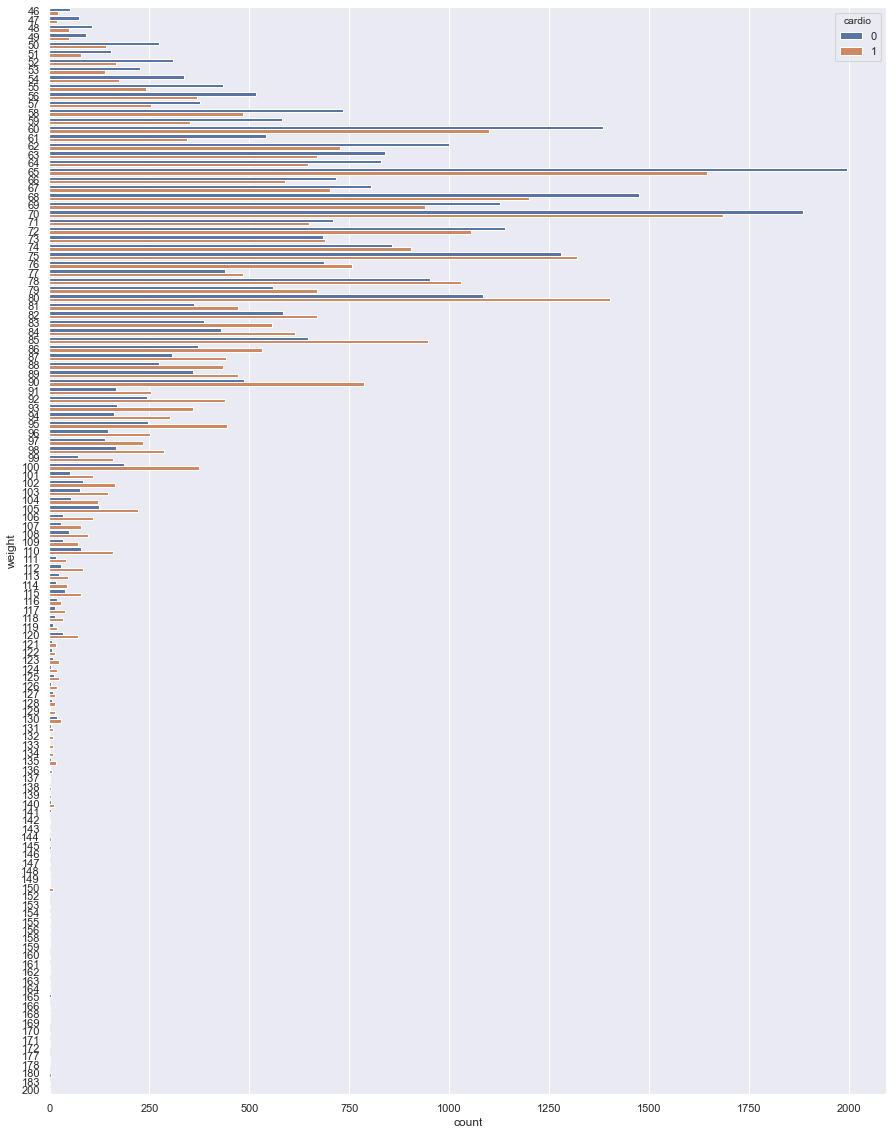

In [15]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 20
df['weight'] = (df['weight']).round().astype('int')
sns.countplot(y='weight', hue='cardio', data = df);


###  Categorical Variables in the Dataset and their Distribution:

Compare categorical variables, cholesterol, glucose, smoking alcohol, and activity distribution. 

In [ ]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));


### Bivariate Analysis

Categorical variables by target class :It is evident that patients with CVD have higher cholesterol and blood glucose level (look at Red and Green bars), also they are less active (higher blue and lower orange bar).

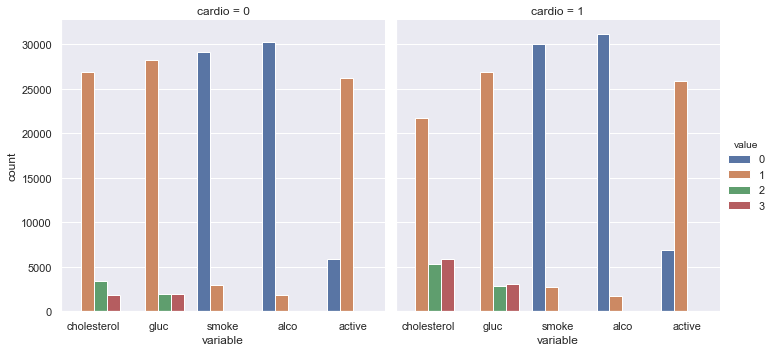

In [17]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");


### Avg Height of Woman and Men:
To figure out whether "1" stands for women or men in the gender column. Calculate the mean of height per gender. We assume that men are taller than women on average.

Average height for women in data is 161.1 cm and average height of men is 170 cmm.

Based on the outcome, women ware denoted by 1, and Man are represented by 2. 

In [18]:
df.groupby('gender')['height'].mean()

gender
1    161.579902
2    170.084542
Name: height, dtype: float64

In [19]:
df.groupby('gender')['smoke'].mean()

gender
1    0.017584
2    0.217195
Name: smoke, dtype: float64

In [20]:
df.groupby('gender')['alco'].mean()

gender
1    0.025314
2    0.105341
Name: alco, dtype: float64


### Count number of Man and Woman

Count the number of Men and Women in Dataset. There are more number of Women in dataset than Men.

In [21]:
df['gender'].value_counts()

1    41914
2    23030
Name: gender, dtype: int64


### HeatMap

Heat Maps is a type of plot which is necessary when we need to find the dependent variables

Age show some correlation with glucose, ap_lo, ap_hi, and cholesterol. These variables' values are expected to go up with age. Cardio also show a higher correlation with age, i.e., people at higher age are expected to get CVD.
Alcohol and Smoking show a higher correlation with gender. Men smoke and drink alcohol more than women. However, cardio and smoke do not indicate a high correlation. Smoking is related to height too (maybe a good example of correlation do not lead to causation)

Weight shows a relationship with ap_lo and ap_hi. Also, ap_lo and ap_hi show 70% correlation. A strong relationship is observed between cholesterol and glucose, as well.

<AxesSubplot:>

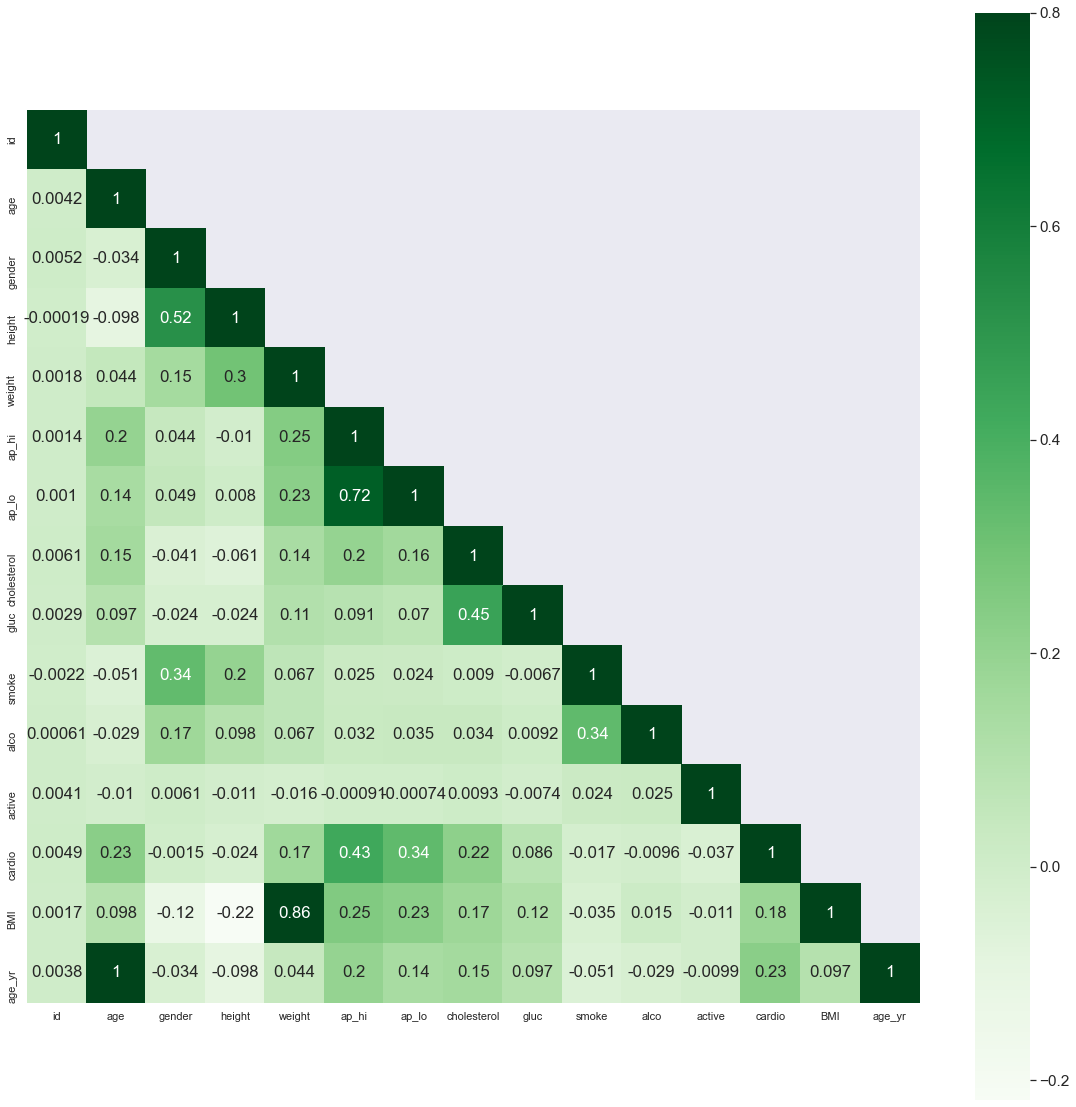

In [22]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.set(font_scale=1.4)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=0.8, square=True,annot=True)

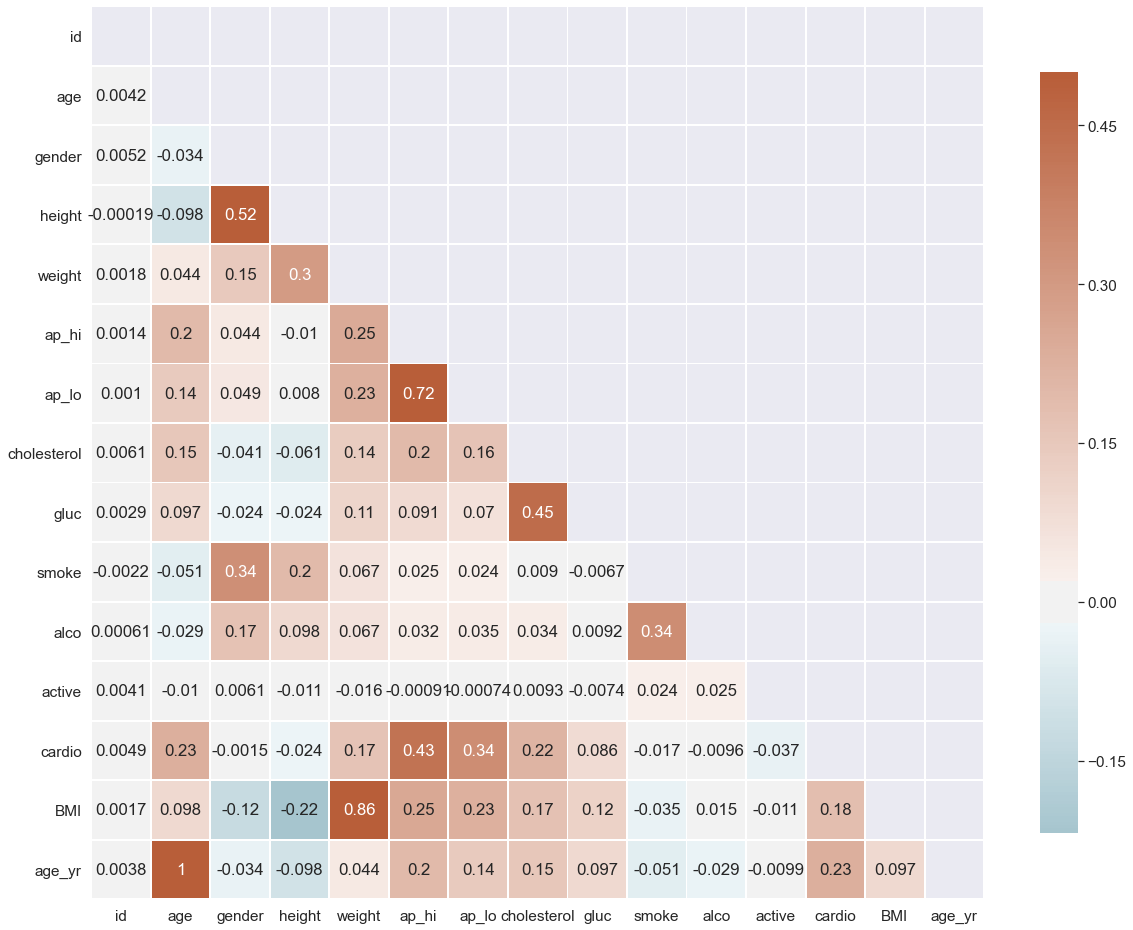

In [23]:
corr = df.corr()
cmap = sns.diverging_palette(220, 25, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,annot = True,
            square=True, linewidths=.9, cbar_kws={"shrink": .7});

### Violinplot

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

Very minimal difference seen with height on CVD and non CVD.

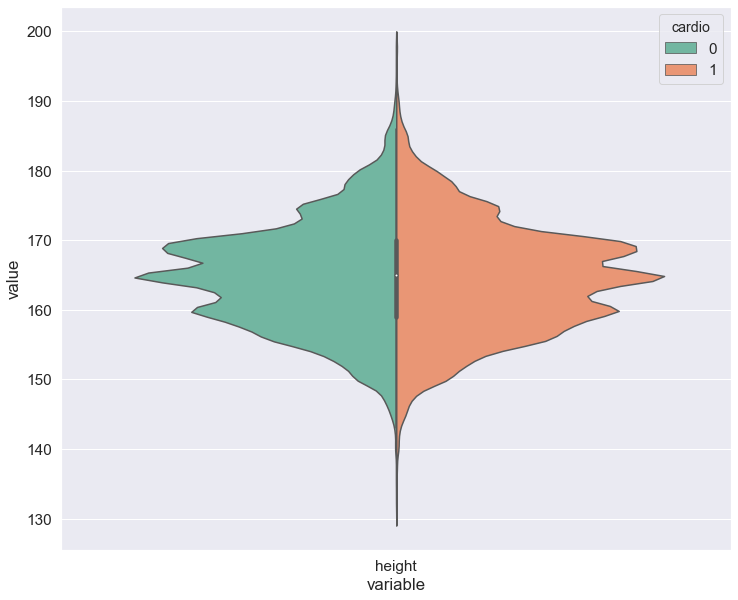

In [24]:
# Height
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

Similar trend was observed for Weight too. 

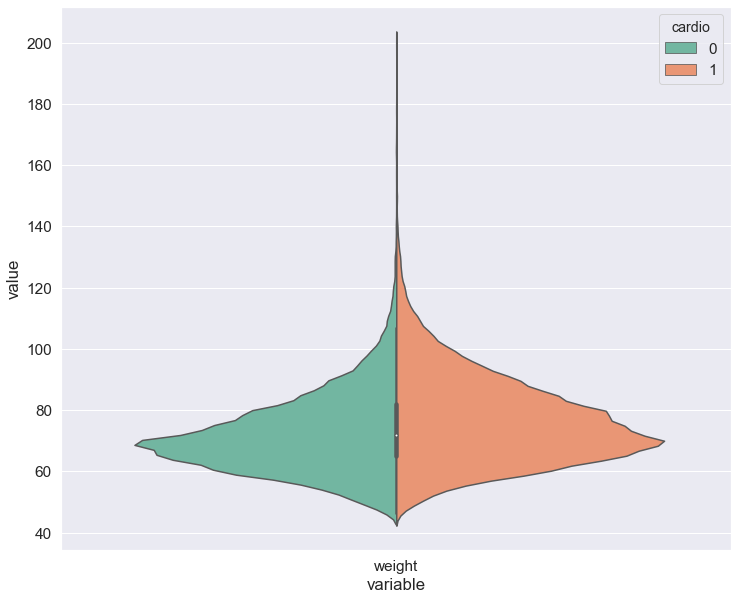

In [25]:
# Weight
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['weight'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

In [26]:
# age transformations
df['age_yr'] = df['age'].apply(lambda x: calculate_age(x))
df['age_cat'] = df['age_yr'].apply(lambda x: categorize_age(x))
df.head(5)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168      62    110     80            1     1      0   
1   1  20228       1     156      85    140     90            3     1      0   
2   2  18857       1     165      64    130     70            3     1      0   
3   3  17623       2     169      82    150    100            1     1      0   
5   8  21914       1     151      67    120     80            2     2      0   

   alco  active  cardio        BMI  age_yr              age_cat  
0     0       1       0  21.967120      50      Adult (0 to 50)  
1     0       1       1  34.927679      55  Mid_Aged (50 to 65)  
2     0       0       1  23.507805      51  Mid_Aged (50 to 65)  
3     0       1       1  28.710479      48      Adult (0 to 50)  
5     0       0       0  29.384676      59  Mid_Aged (50 to 65)

Vilion plot for age with Cardio show good relation ship. Higer ager show more possibility of CVD. 

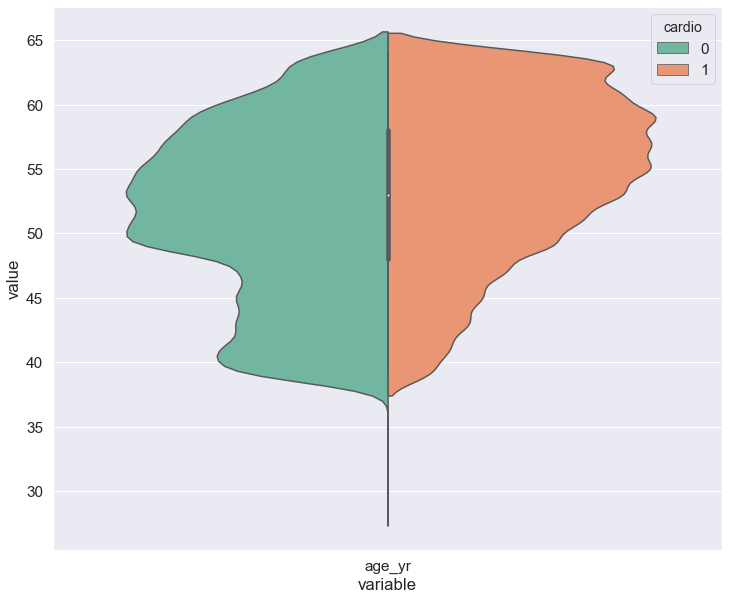

In [27]:
# Age
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['age_yr'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

ap_lo larger than 80 indicates higer possibility of CVD

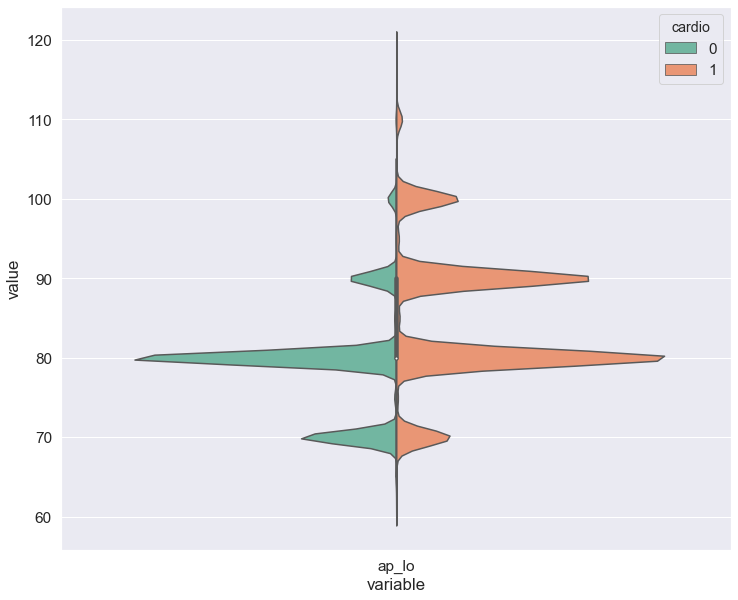

In [28]:
# ap_lo
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['ap_lo'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

ap_hi larger than 120 indicates higer possibility of CVD

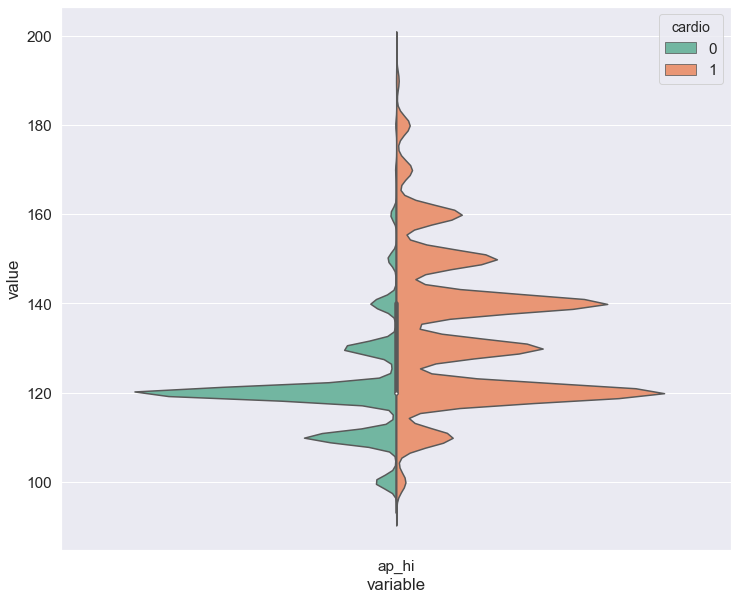

In [29]:
# ap_hi
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['ap_hi'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

BMI above 25 is showing high corelation with CVD.

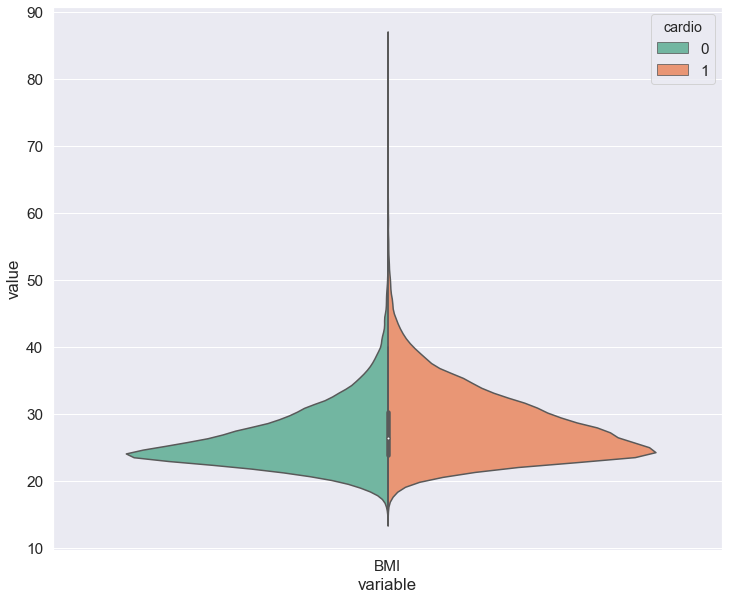

In [30]:
# BMI
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['BMI'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

Villon graph below is it shows the relationship between gender and smoking. The chart demonstrates that there more non-smoking women than men, and men smoke more than women. 

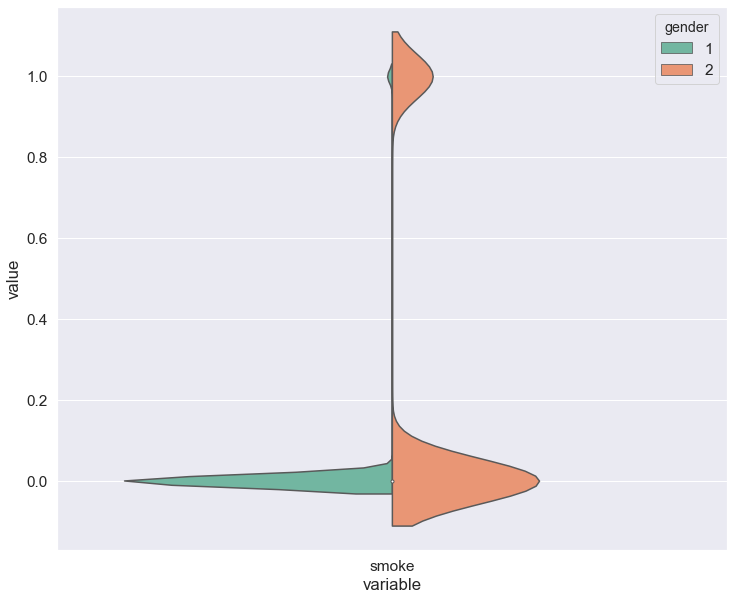

In [31]:
# Gender Vs Smoke
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['smoke'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");


The Villon graph below is it shows the relationship between gender and alcohol. The chart demonstrates that there more alcohol drinkers in men than women.


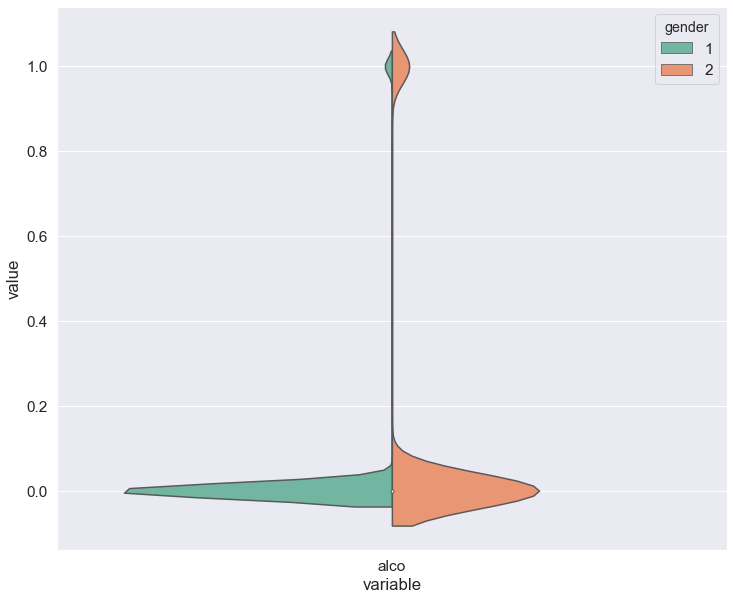

In [32]:
# Gender Vs Smoke
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['alco'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

### Body Mass Index (BMI)


Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women.

The box plot below shares multiple BMI dimensions, relating BMI (which is a mix of Wight and height), gender, alcohol, and Cardio. Key observations
* BMI is a little higher for CVD
* People consuming alcohol have higher BMI
* Women BMI is more sensitive to alcohol vs. men


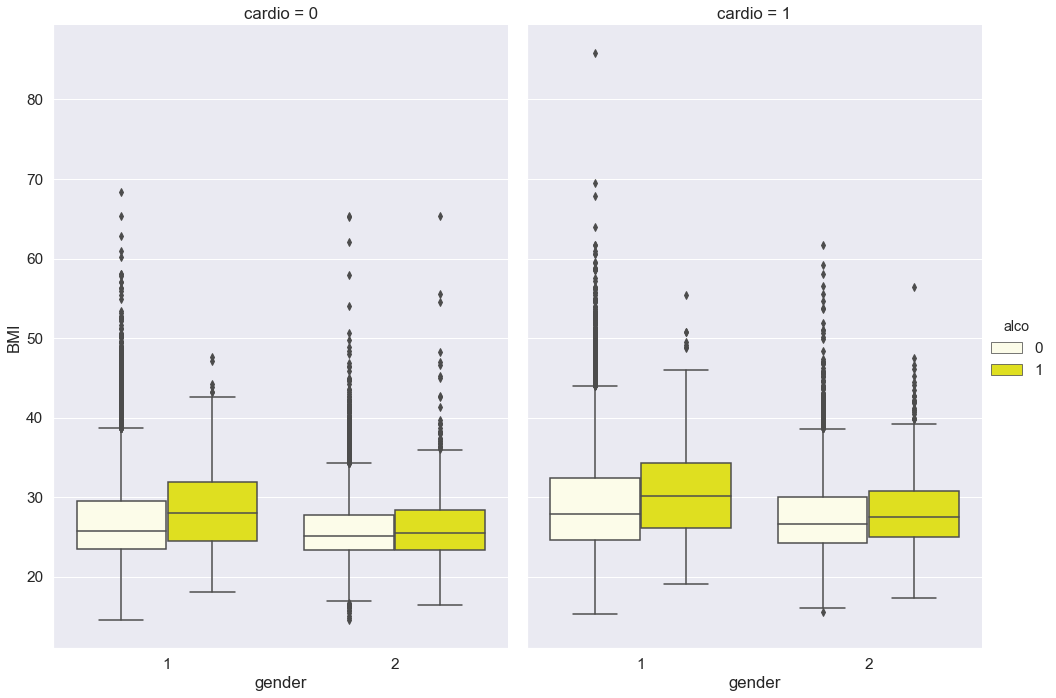

In [33]:
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

<AxesSubplot:xlabel='age_cat', ylabel='count'>

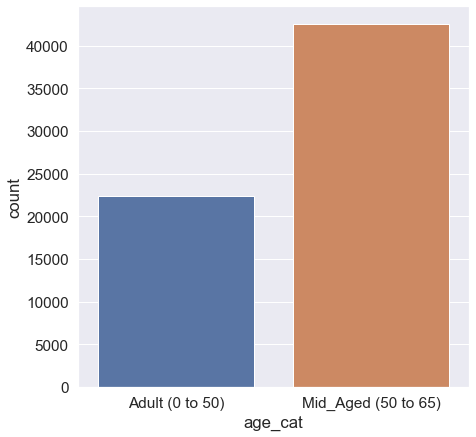

In [34]:
# Visulization of age groups
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', data = df) 

<AxesSubplot:xlabel='age_cat', ylabel='count'>

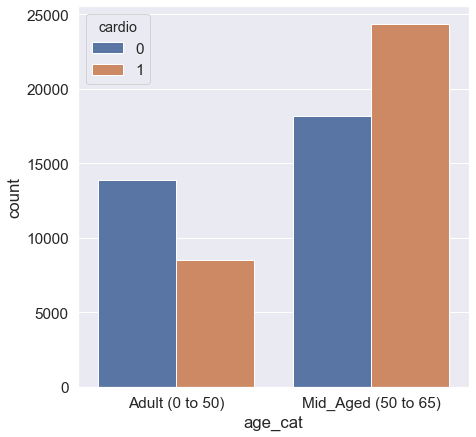

In [35]:
# Visulization of age groups with cvd info
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', hue = 'cardio', data = df) 


''

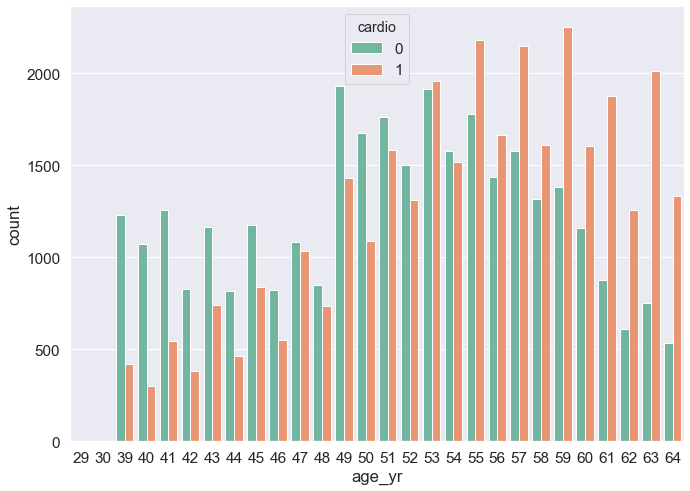

In [36]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age_yr', hue='cardio', data = df, palette="Set2")
;


### Pairplot


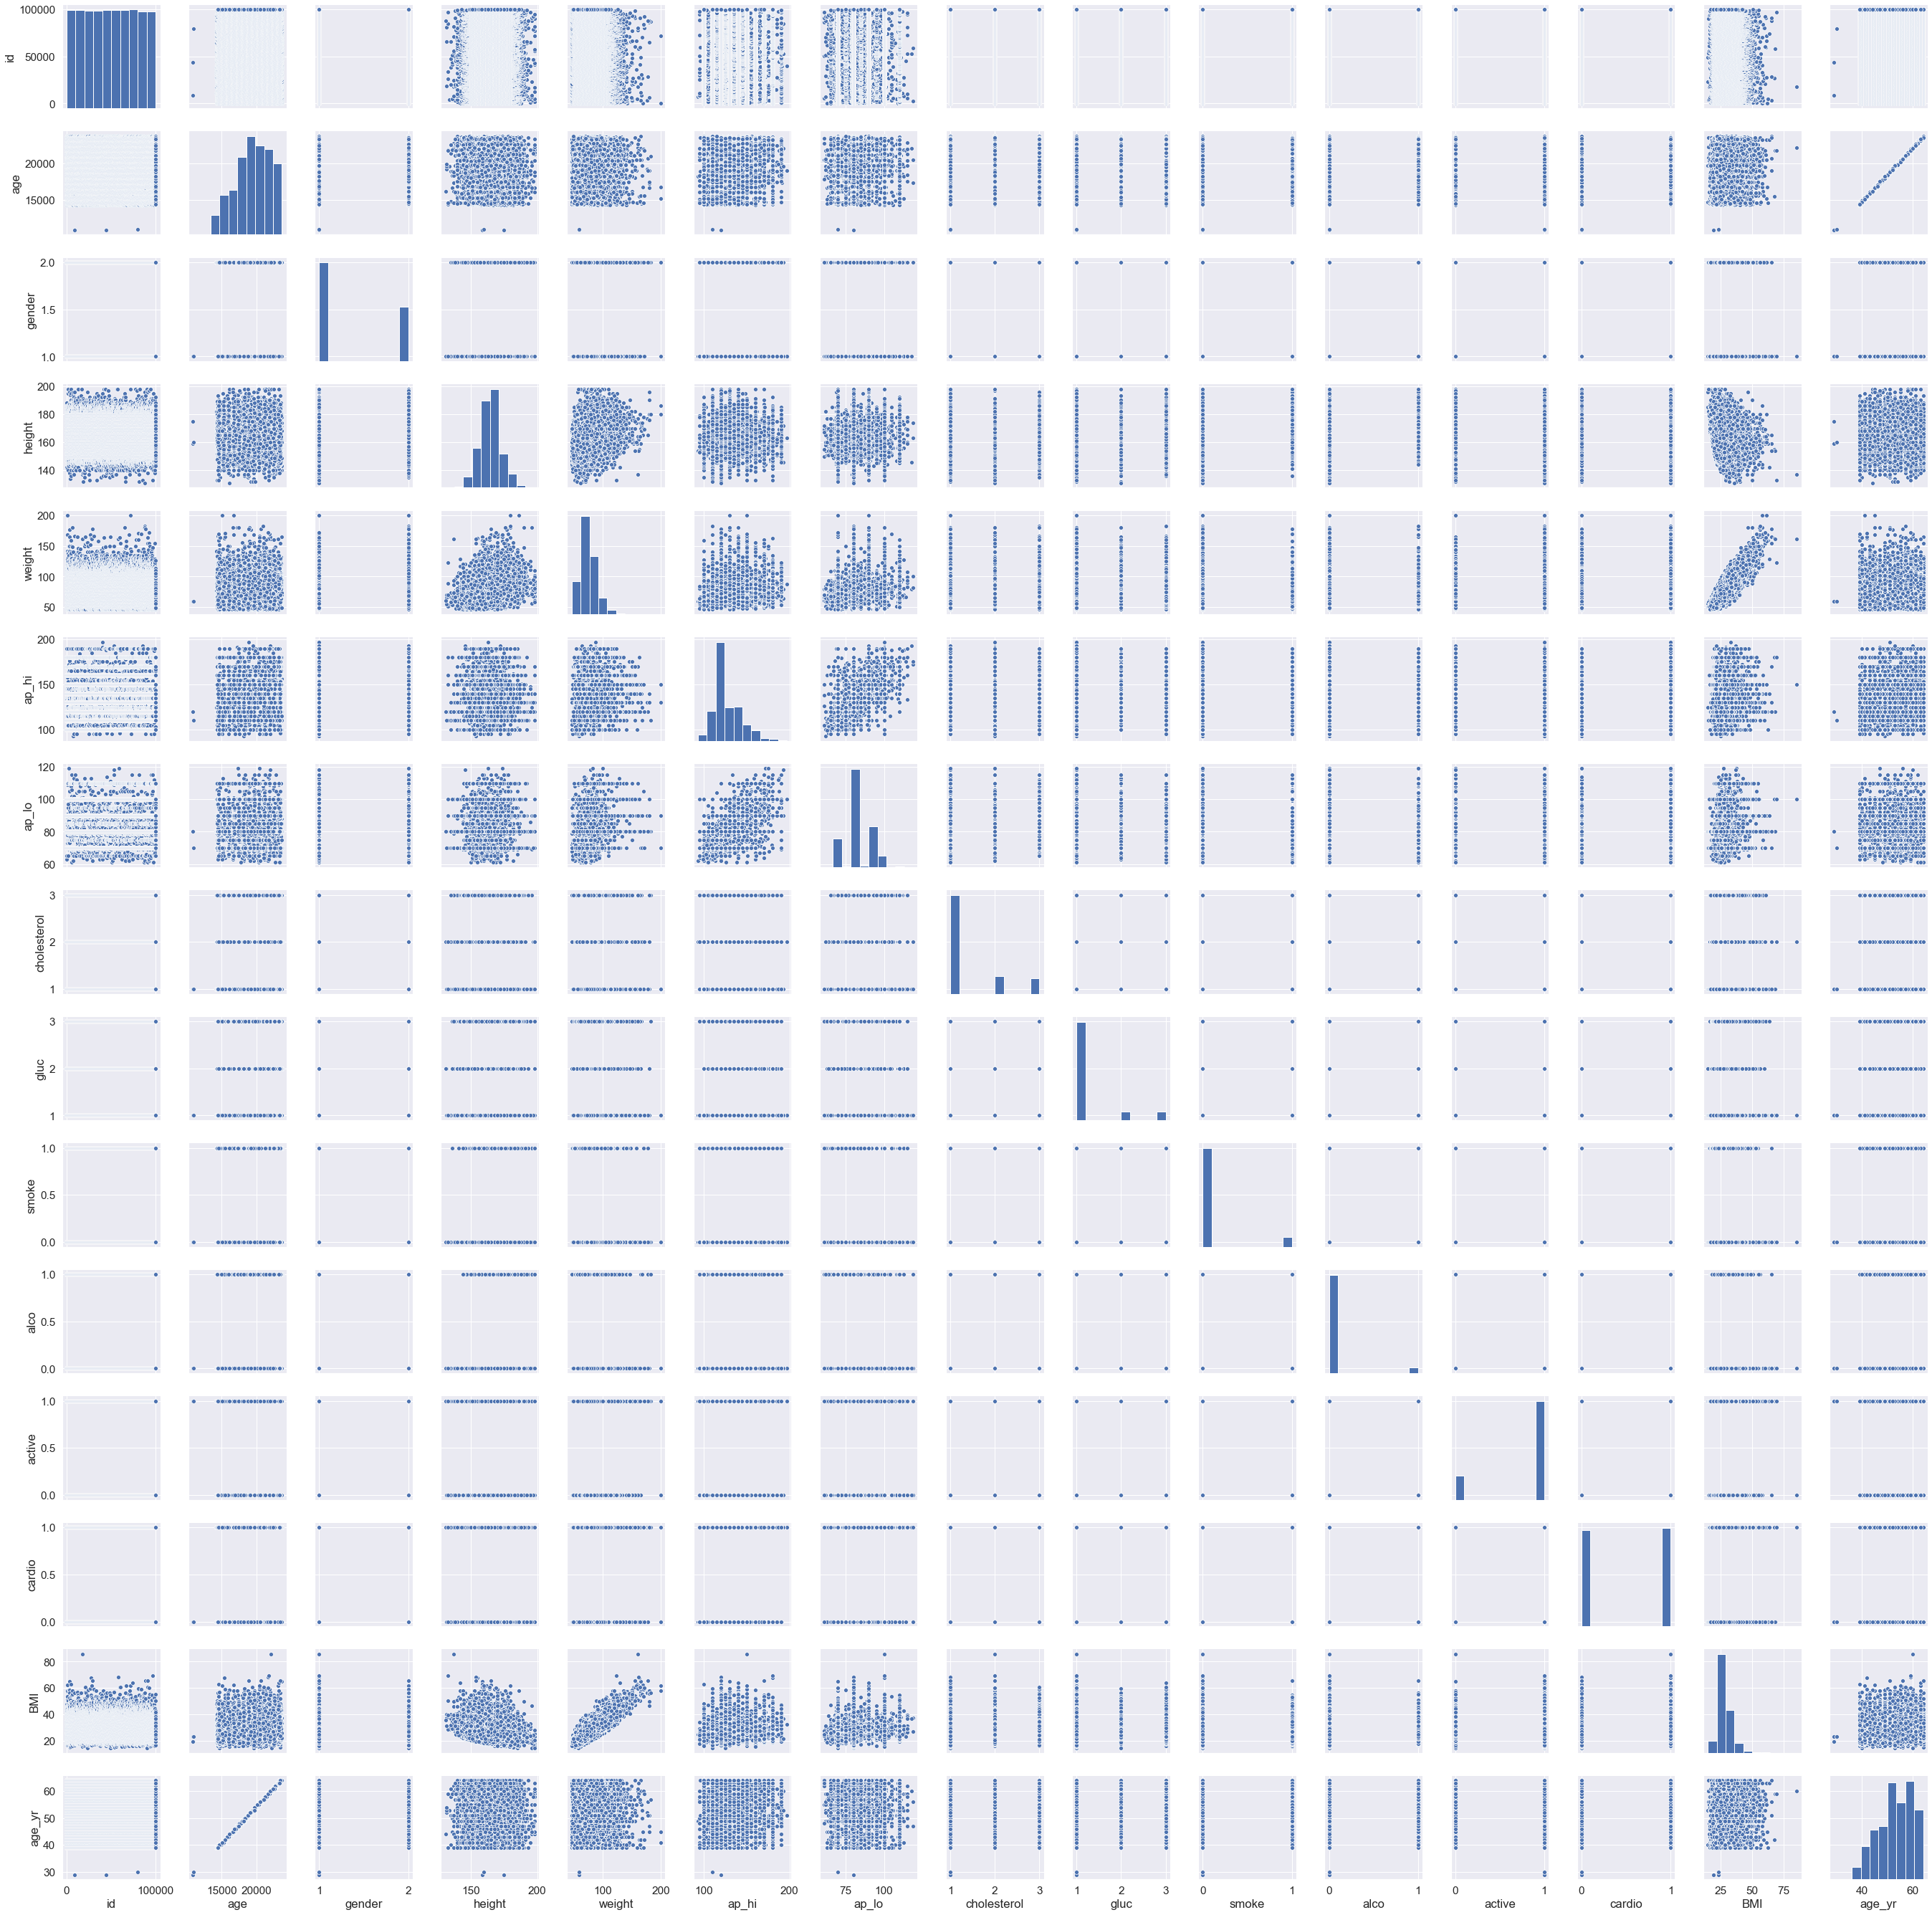

In [37]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)

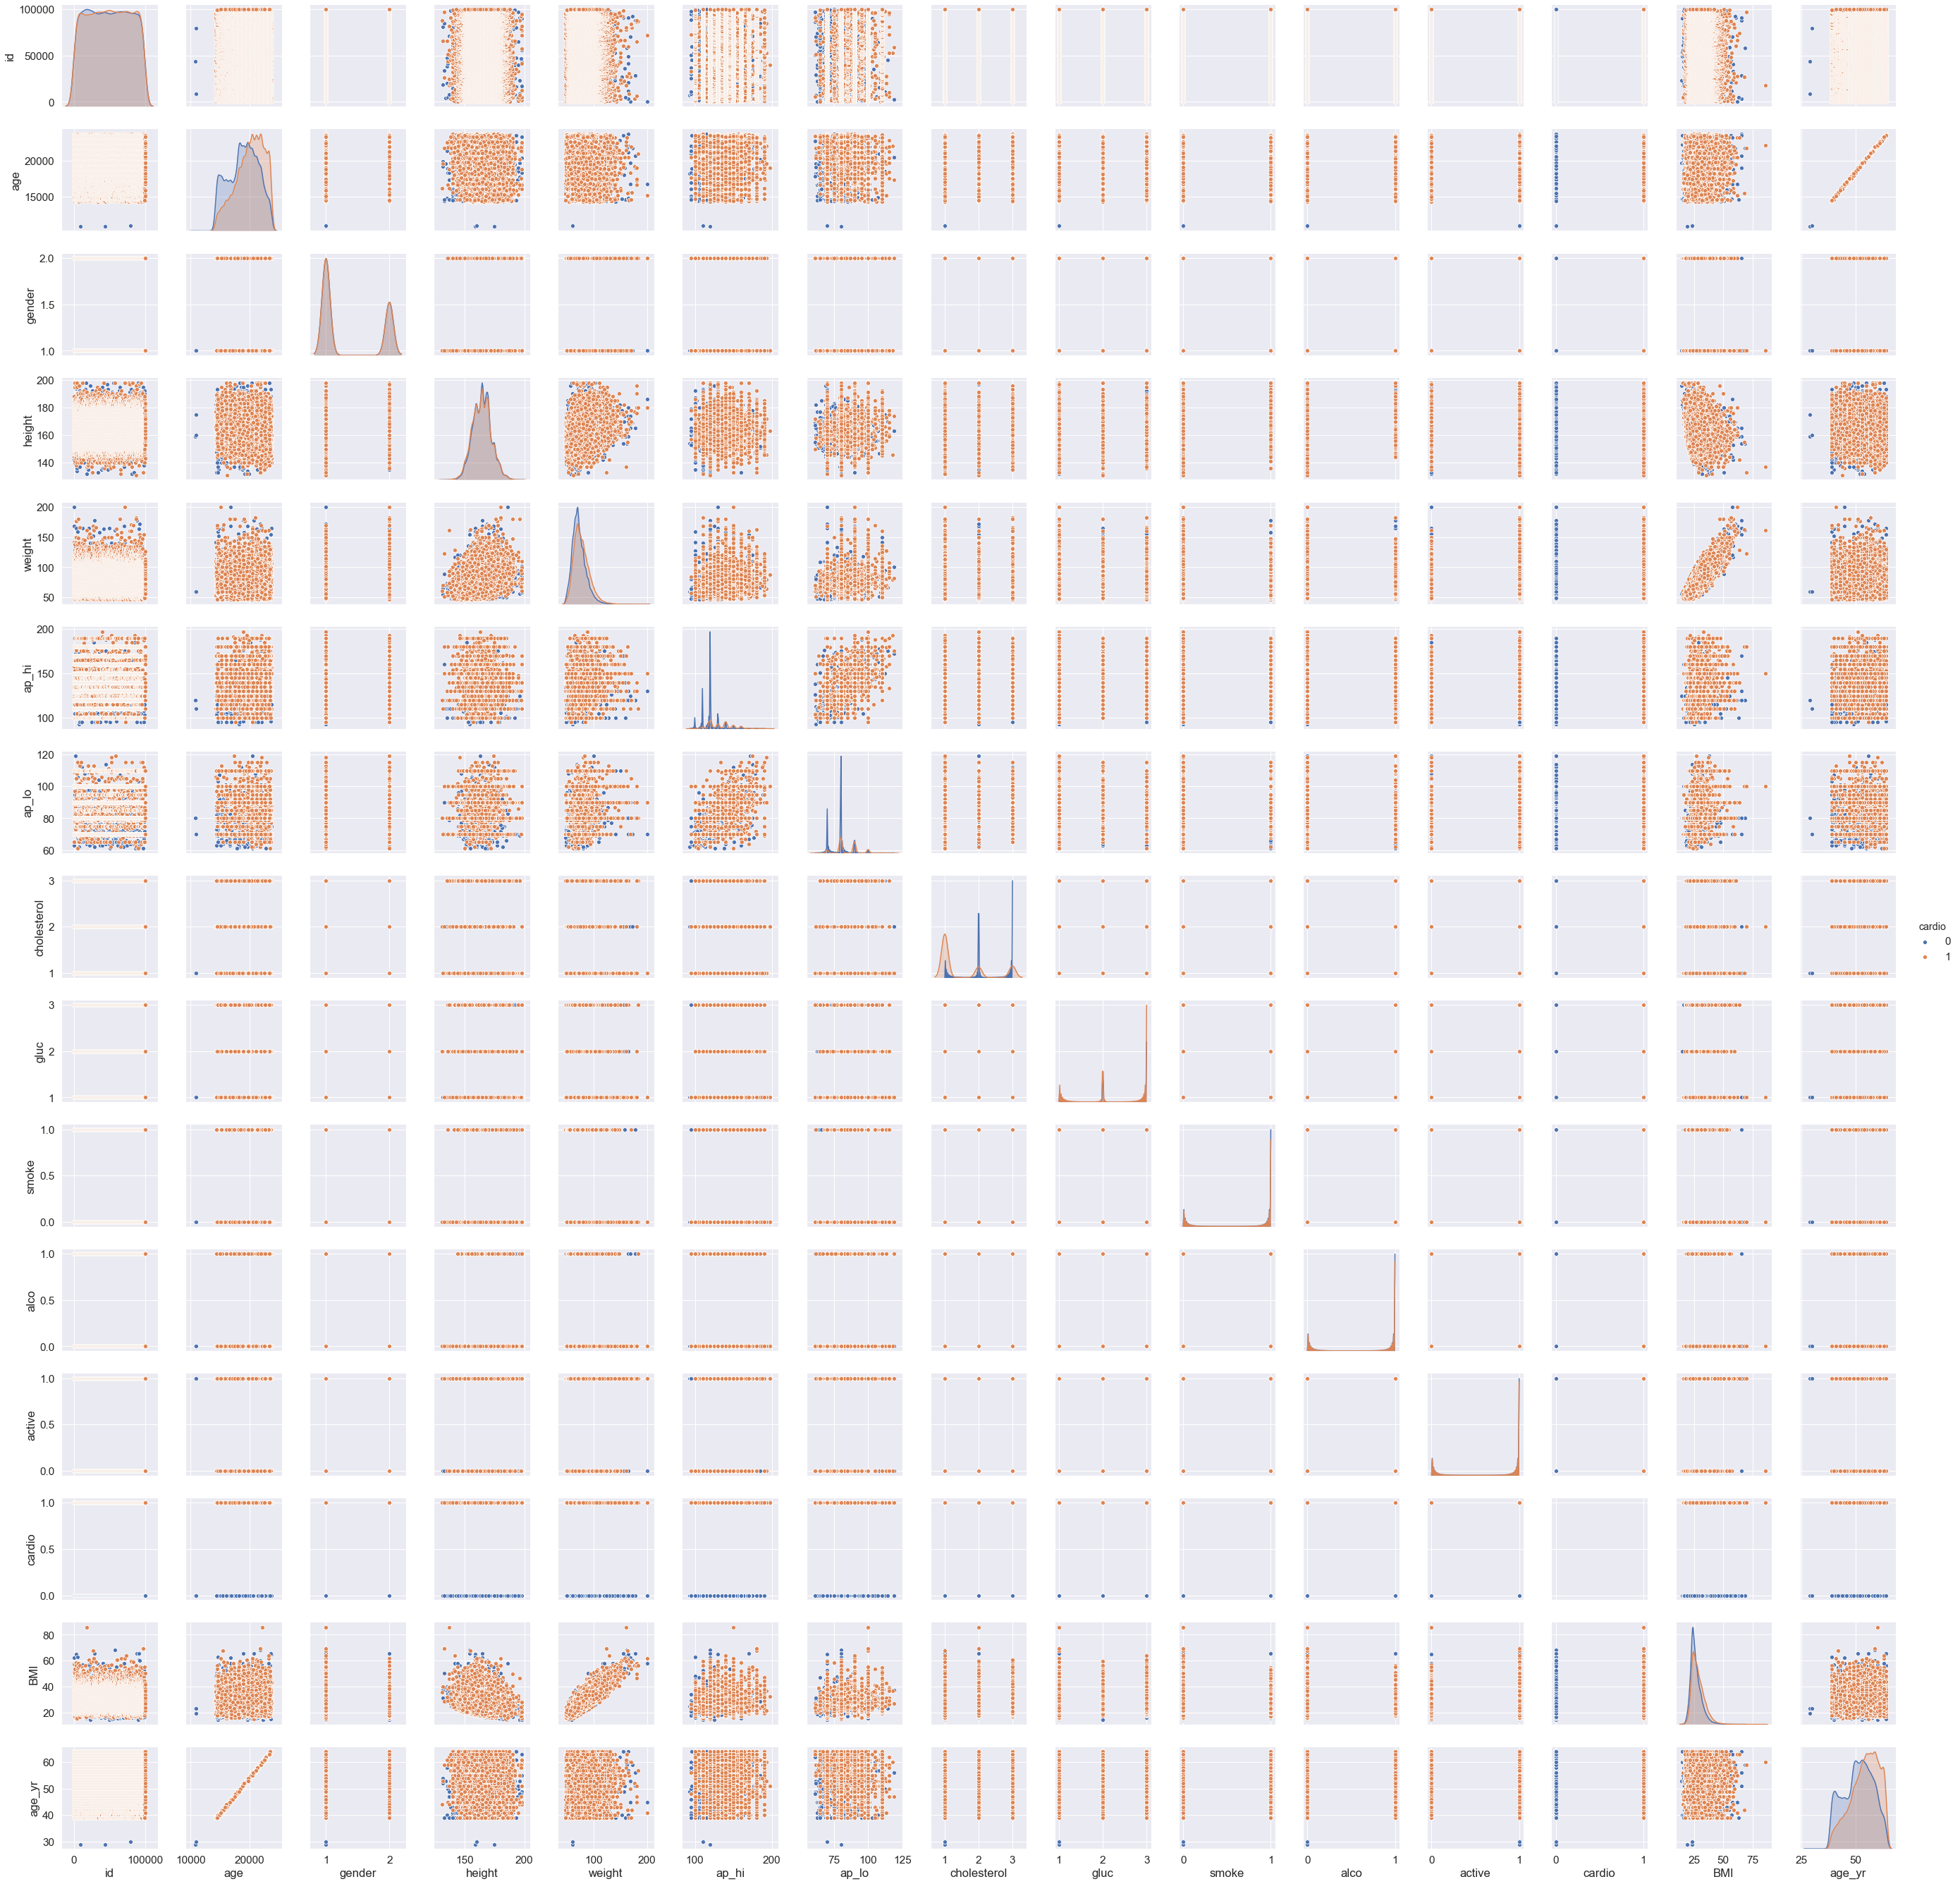

In [38]:
sns.pairplot(df, hue = 'cardio')

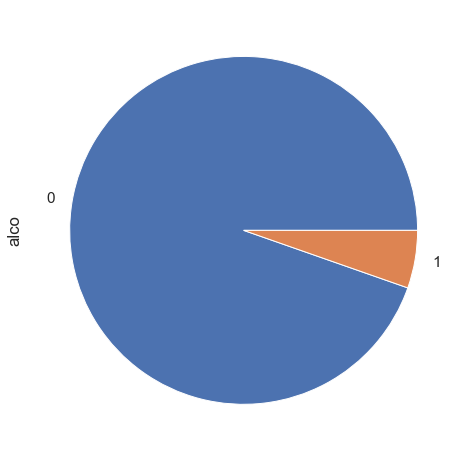

In [189]:
# Alcohol consumption 
df["alco"].value_counts().plot(kind='pie')

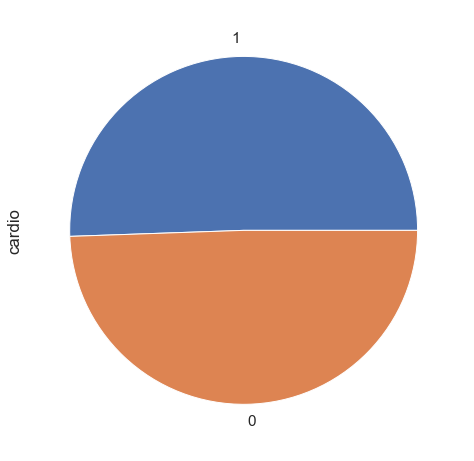

In [192]:
# Alcohol consumption 
df["cardio"].value_counts().plot(kind='pie')

In [ ]:

### Blood Pressure Category


In [40]:
def categorize_blood_pressure(x):
  if x['ap_hi'] < 130 and x['ap_lo'] < 90:
    return "Normal"
  elif 130 <= x['ap_hi'] < 140 or 90 <=x ['ap_lo'] < 100:
    return "Elevated"
  elif 140 <=x ['ap_hi']  or 100 <= x['ap_lo']:
    return "High Blood Pressure"


# categorizing blood pressure
df['blood_category'] = df.apply(categorize_blood_pressure, axis=1)
 
df.head(5)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168      62    110     80            1     1      0   
1   1  20228       1     156      85    140     90            3     1      0   
2   2  18857       1     165      64    130     70            3     1      0   
3   3  17623       2     169      82    150    100            1     1      0   
5   8  21914       1     151      67    120     80            2     2      0   

   alco  active  cardio        BMI  age_yr              age_cat  \
0     0       1       0  21.967120      50      Adult (0 to 50)   
1     0       1       1  34.927679      55  Mid_Aged (50 to 65)   
2     0       0       1  23.507805      52  Mid_Aged (50 to 65)   
3     0       1       1  28.710479      48      Adult (0 to 50)   
5     0       0       0  29.384676      60  Mid_Aged (50 to 65)   

        blood_category  
0               Normal  
1             Elevated  
2             Elevated  
3  High Blood Pressure  
5               Normal

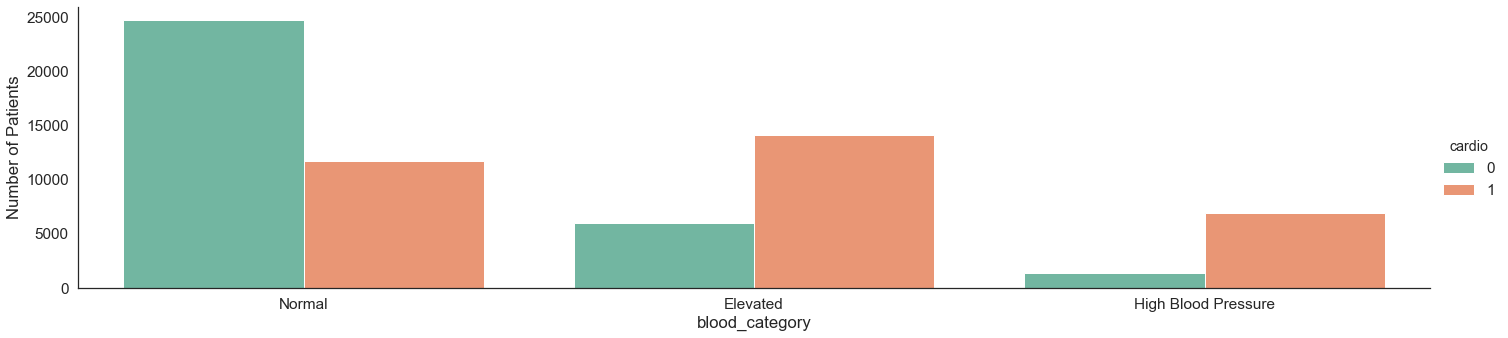

In [41]:
with sns.axes_style('white'):
    g = sns.factorplot("blood_category", data=df, aspect=4.0, kind='count',
                       hue='cardio', palette="Set2", order=["Normal", "Elevated", "High Blood Pressure"])
    g.set_ylabels('Number of Patients')

In [42]:
# Create high probability CVD frame
df_cvd_hi=df.loc[(df.ap_lo>80) & (df.ap_hi>120) & (df.age_yr>54) & (df.gluc>1) & (df.cholesterol>1)]
df_cvd_hi.shape

(1566, 17)

In [43]:
df_cvd_hi.head(5)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
7     12  22584       2     178      95    130     90            3     3   
22    32  23046       1     158      90    145     85            2     2   
86   117  21909       1     156      75    150     90            2     2   
132  177  22585       2     164      84    150     89            2     2   
291  400  20310       1     159      79    140     90            2     2   

     smoke  alco  active  cardio        BMI  age_yr              age_cat  \
7        0     0       1       1  29.983588      62  Mid_Aged (50 to 65)   
22       0     0       1       1  36.051915      63  Mid_Aged (50 to 65)   
86       0     0       1       1  30.818540      60  Mid_Aged (50 to 65)   
132      0     0       1       0  31.231410      62  Mid_Aged (50 to 65)   
291      0     0       1       1  31.248764      56  Mid_Aged (50 to 65)   

          blood_category  
7               Elevated  
22   High Blood Pressure  
86              Elevated  
132  High Blood Pressure  
291             Elevated

<AxesSubplot:ylabel='cardio'>

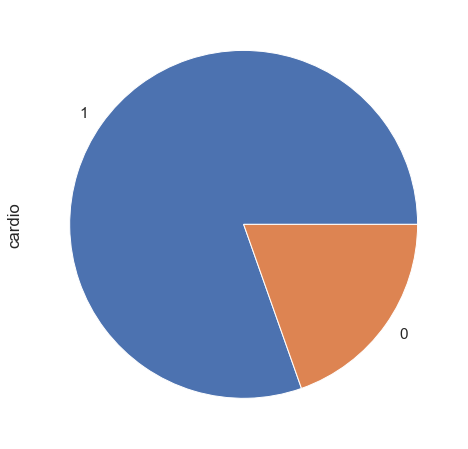

In [44]:
df_cvd_hi["cardio"].value_counts().plot(kind='pie')

In [45]:
df_cvd_hi["cardio"].value_counts()

1    1259
0     307
Name: cardio, dtype: int64

KeyError: ' height'

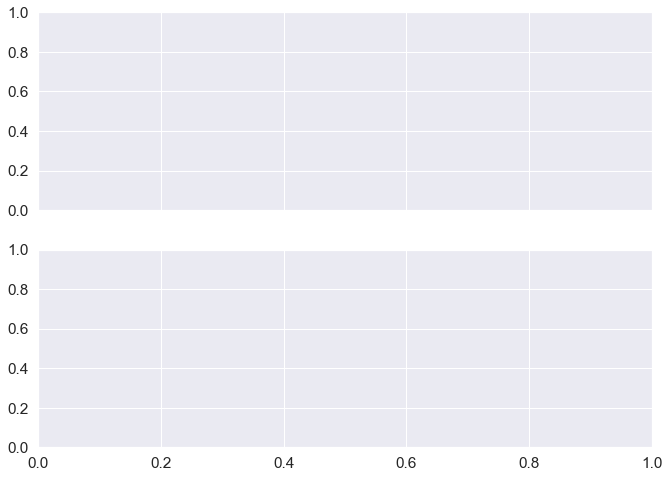

In [46]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
mean=df[' height'].mean()
median=df[' height'].median()
mode=df[' height'].mode().get_values()[0]

sns.boxplot(df[" height"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df[" height"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

In [47]:
df

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168      62    110     80            1     1   
1          1  20228       1     156      85    140     90            3     1   
2          2  18857       1     165      64    130     70            3     1   
3          3  17623       2     169      82    150    100            1     1   
5          8  21914       1     151      67    120     80            2     2   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168      76    120     80            1     1   
69996  99995  22601       1     158     126    140     90            2     2   
69997  99996  19066       2     183     105    180     90            3     1   
69998  99998  22431       1     163      72    135     80            1     2   
69999  99999  20540       1     170      72    120     80            2     1   

       smoke  alco  active  cardio        BMI  age_yr              age_cat  \
0          0     0       1       0  21.967120      50      Adult (0 to 50)   
1          0     0       1       1  34.927679      55  Mid_Aged (50 to 65)   
2          0     0       0       1  23.507805      52  Mid_Aged (50 to 65)   
3          0     0       1       1  28.710479      48      Adult (0 to 50)   
5          0     0       0       0  29.384676      60  Mid_Aged (50 to 65)   
...      ...   ...     ...     ...        ...     ...                  ...   
69995      1     0       1       0  26.927438      53  Mid_Aged (50 to 65)   
69996      0     0       1       1  50.472681      62  Mid_Aged (50 to 65)   
69997      0     1       0       1  31.353579      52  Mid_Aged (50 to 65)   
69998      0     0       0       1  27.099251      61  Mid_Aged (50 to 65)   
69999      0     0       1       0  24.913495      56  Mid_Aged (50 to 65)   

            blood_category  
0                   Normal  
1                 Elevated  
2                 Elevated  
3      High Blood Pressure  
5                   Normal  
...                    ...  
69995               Normal  
69996             Elevated  
69997             Elevated  
69998             Elevated  
69999               Normal  

[64944 rows x 17 columns]